<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Advanced Machine Learning: Credit Card Users Churn Prediction</span>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:green">Muthuraman Muthusubramanian</span>

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Problem Statement</span>

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Installing necessary library versions</span>

In [3]:
# verify the version numbers of packages installed.
!pip freeze | grep numpy
!pip freeze | grep pandas
!pip freeze | grep matplotlib
!pip freeze | grep seaborn
!pip freeze | grep scikit-learn
!pip freeze | grep scipy
!pip freeze | grep xgboost

numpy==1.26.4
geopandas==0.14.4
pandas==2.1.4
pandas-datareader==0.10.0
pandas-gbq==0.19.2
pandas-stubs==2.1.4.231227
sklearn-pandas==2.2.0
matplotlib==3.7.1
matplotlib-inline==0.1.7
matplotlib-venn==0.11.10
seaborn==0.13.1
scikit-learn==1.3.2
scipy==1.13.1
xgboost==2.1.1


In [5]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas xgboost -q --user

In [6]:
# Installing the libraries with the specified version.
!pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Importing Libraries</span>

In [7]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Loading the dataset</span>

In [8]:
churn = pd.read_csv("https://raw.githubusercontent.com/aimlalchemists/credit-card-users-churn-prediction/main/BankChurners.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [10]:
# Checking the number of rows and columns in the training data
churn.shape

(10127, 21)

- The dataset has 10127 rows and 21 columns.

In [11]:
# let's create a copy of the data
data = churn.copy()

### Displaying the first few rows of the dataset

In [12]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [13]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [16]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are missing values in the Education_Level and Marital_Status columns.
- Five columns are of object type, while the rest are numerical.

### Checking for duplicate values

In [17]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

### Checking for missing values

In [18]:
# let's check for missing values in the data
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


- Education_Level has 1519 missing values.
- Marital_Status has 749 missing values.

### Statistical summary of the dataset

In [19]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


### Observations

- **CLIENTNUM**: This unique identifier for customers can be dropped as it doesn't contribute to our analysis.
- **Customer_Age**: The average age of customers is 46 years, with ages ranging from 26 to 73 years.
- **Dependent_count**: On average, customers have 2 dependents, with a maximum of 5 dependents.
- **Months_on_book**: All customers have been with the bank for at least a year, and 50% have been customers for at least 3 years.
- **Total_Relationship_Count**: Every customer uses at least one bank product, while 75% use 5 or fewer products.
- **Months_Inactive_12_mon**: On average, customers were inactive for two months in the past year, indicating active engagement in transactions or card usage. It would be interesting to see if high inactivity correlates with customer churn.
- **Contacts_Count_12_mon**: On average, the bank and customers interacted twice in the past year.
- **Credit_Limit**: There is a significant difference between the third quartile and the maximum value. The credit limit ranges widely from 1438 to 34516, with high credit limits potentially indicating outliers.
- **Total_Revolving_Bal**: The average revolving balance is 1162, with little difference between the third quartile and the maximum value.
- **Avg_Open_To_Buy**: The average unused credit amount is 7469, with a wide range suggesting potential outliers at the extreme values.
- **Total_Amt_Chng_Q4_Q1**: For 75% of customers, the transaction amount in Q4 was less than in Q1, with a value around 0.9.
- **Total_Trans_Amt**: The average transaction amount over the last 12 months is 4404, with some customers spending as little as 510 and others more than 18,000.
- **Total_Trans_Ct**: On average, customers made 64 or fewer transactions, with 75% making up to 81 transactions.
- **Total_Ct_Chng_Q4_Q1**: For 75% of customers, the number of transactions in Q4 was less than in Q1.
- **Avg_Utilization_Ratio**: On average, customers used about 27% of their available credit, with 75% utilizing 50% or less.

In [20]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [21]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

### Observations
- Majority of the records belongs to existing customers.
- There are missing values.
- Most customers are married.
- Most customers have Blue card.
- Majority of the customers belong to less than $40k category.
- Most of the bank's customers are female.
- Significant number of customers are graduates.
- "abc" is not a correct value for Income_Category.

In [22]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [23]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [33]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Combine a boxplot and histogram for a given feature.

    Parameters:
    data (DataFrame): The dataframe containing the data.
    feature (str): The column to plot.
    figsize (tuple): The size of the figure (default is (12, 7)).
    kde (bool): Whether to show the density curve (default is False).
    bins (int): The number of bins for the histogram (default is None).
    """

    # Create a 2-row subplot grid with shared x-axis
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows in the subplot grid
        sharex=True,  # Share the x-axis among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # Set height ratios for the subplots
        figsize=figsize,  # Set the figure size
    )

    # Create a boxplot for the feature
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # Show means with a triangle indicator

    # Create a histogram for the feature
    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )

    # Add a vertical line for the mean value
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )

    # Add a vertical line for the median value
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [29]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Create a bar plot with labels showing either counts or percentages.

    Parameters:
    data (DataFrame): The dataframe containing the data.
    feature (str): The column to plot.
    perc (bool): Whether to display percentages instead of counts (default is False).
    n (int): The number of top category levels to display (default is None, i.e., display all levels).
    """

    # Calculate the total number of entries in the feature column
    total = len(data[feature])

    # Get the number of unique categories in the feature column
    count = data[feature].nunique()

    # Set the figure size based on the number of categories or the specified top n categories
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, fontsize=15)

    # Create a count plot for the feature column
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Annotate each bar with the count or percentage
    for p in ax.patches:
        if perc:
            # Calculate the percentage for each category
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            # Use the count for each category
            label = p.get_height()

        # Calculate the position for the annotation
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        # Annotate the bar with the label
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    # Display the plot
    plt.show()

In [28]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart.

    Parameters:
    data (DataFrame): The dataframe containing the data.
    predictor (str): The independent variable.
    target (str): The target variable.
    """
    # Get the number of unique categories in the predictor variable
    count = data[predictor].nunique()

    # Determine the category with the least frequency in the target variable
    sorter = data[target].value_counts().index[-1]

    # Create a crosstab of predictor and target, including margins, and sort by the least frequent target category
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    # Print the crosstab table
    print(tab1)
    print("-" * 120)

    # Create a normalized crosstab of predictor and target, and sort by the least frequent target category
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot the normalized crosstab as a stacked bar chart
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))

    # Adjust the legend position
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Display the plot
    plt.show()


In [30]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):
    """
    Plot the distribution and boxplots of a predictor variable with respect to the target variable.

    Parameters:
    data (DataFrame): The dataframe containing the data.
    predictor (str): The predictor variable.
    target (str): The target variable.
    """

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Get the unique values of the target variable
    target_uniq = data[target].unique()

    # Plot the distribution of the predictor for the first target category
    axs[0, 0].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    # Plot the distribution of the predictor for the second target category
    axs[0, 1].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    # Plot the boxplot of the predictor with respect to the target variable
    axs[1, 0].set_title("Boxplot of " + predictor + " w.r.t " + target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    # Plot the boxplot of the predictor with respect to the target variable, excluding outliers
    axs[1, 1].set_title("Boxplot of " + predictor + " (without outliers) w.r.t " + target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    # Adjust the layout to prevent overlap
    plt.tight_layout()

    # Display the plots
    plt.show()


### Univariate analysis

### **Observations on Customer_Age**

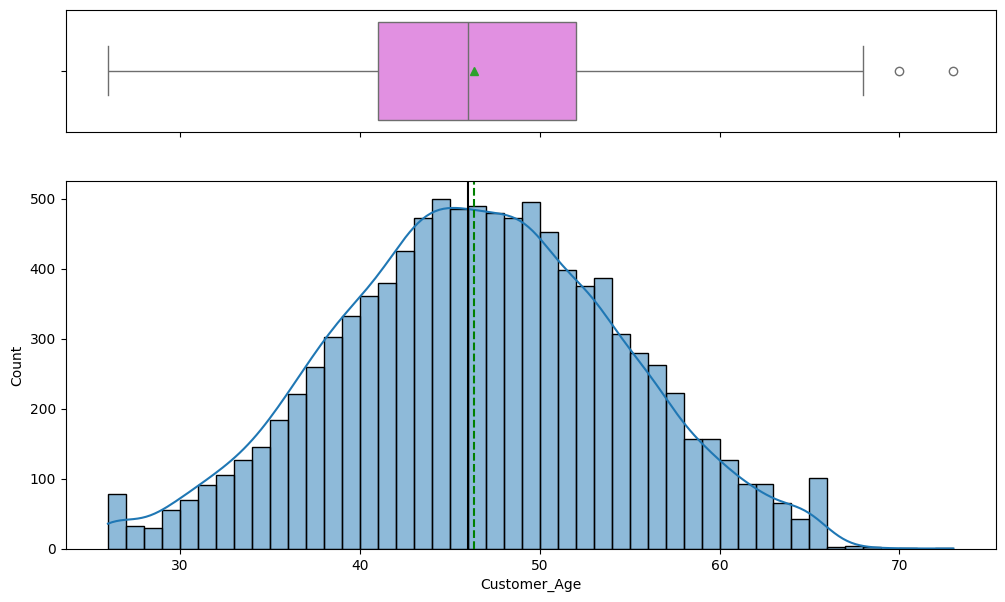

In [34]:
histogram_boxplot(data, "Customer_Age", kde=True)

- The distribution of Customer_Age follows a normal pattern, with both the mean and median at 46 years.
- The boxplot reveals the presence of a few outliers

### **Observations on Months_on_book**

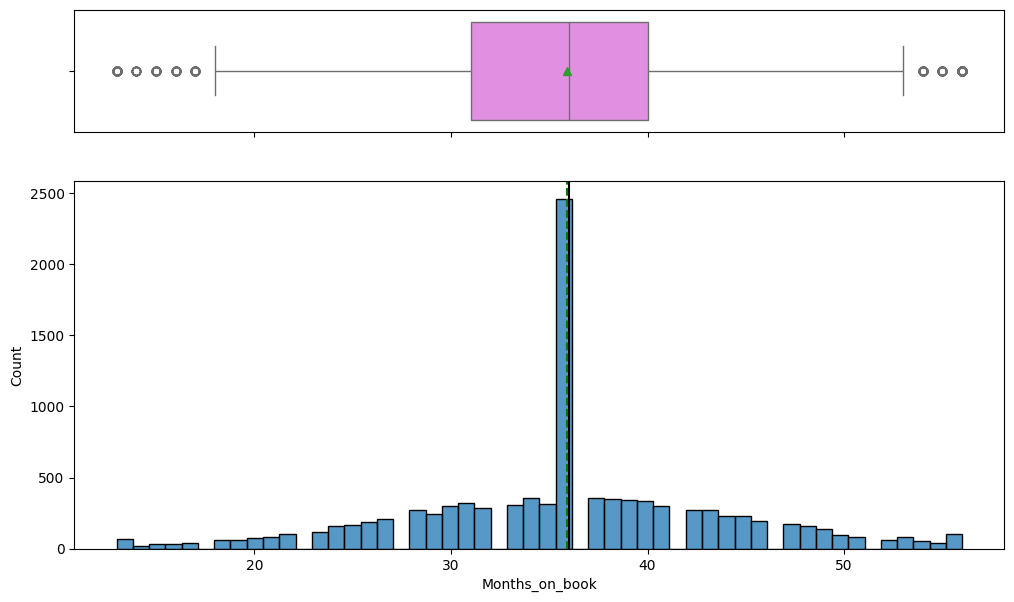

In [35]:
histogram_boxplot(data, "Months_on_book")

- Most customers have been with the bank for 3 years.
- The boxplot indicates the presence of outliers on both ends of the whiskers.

### **Observations on Credit_Limit**

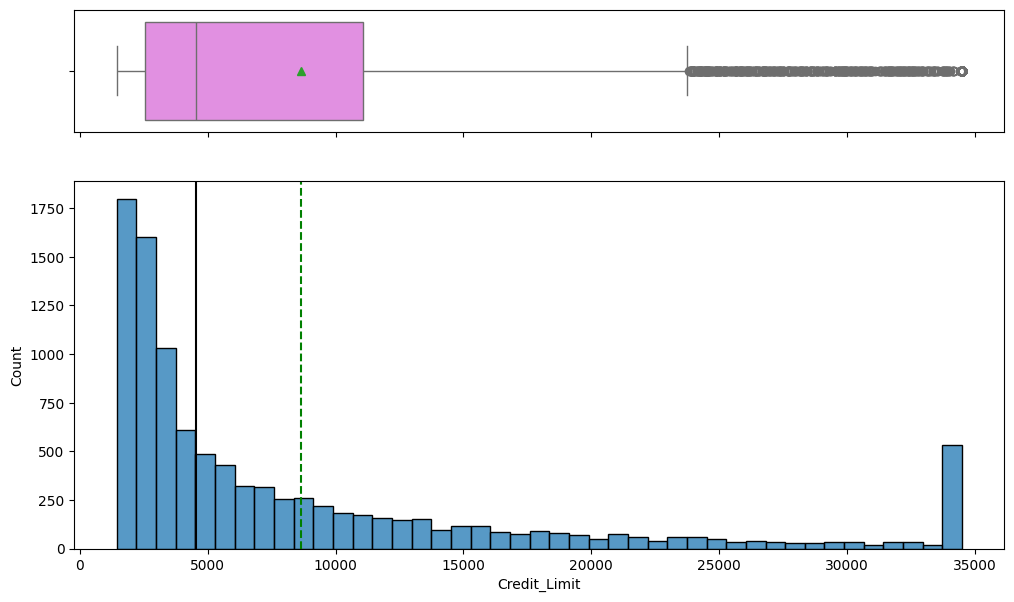

In [36]:
histogram_boxplot(data, "Credit_Limit")

- The Credit_Limit distribution is right-skewed, with several customers having a maximum limit of 35,000.
- Additionally, 50% of the bank’s customers have a credit limit below 5,000.

### **Observations on Total_Revolving_Bal**

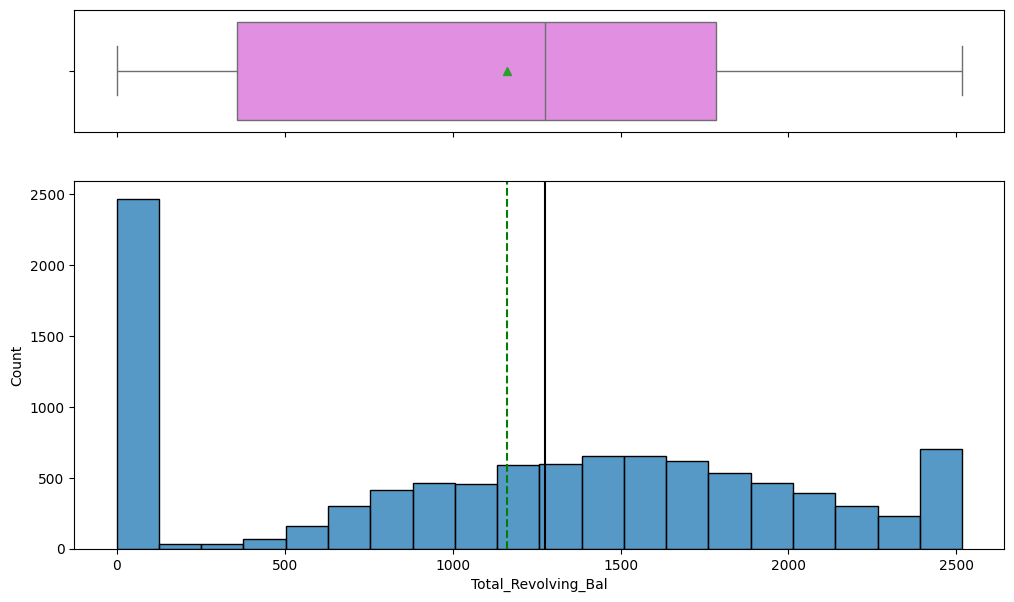

In [37]:
histogram_boxplot(data, "Total_Revolving_Bal")

- Most customers pay their complete credit card dues and have a revolving balance of 0.
- Quite a few customers have a revolving balance of $2,500.

### **Observations on Avg_Open_To_Buy**

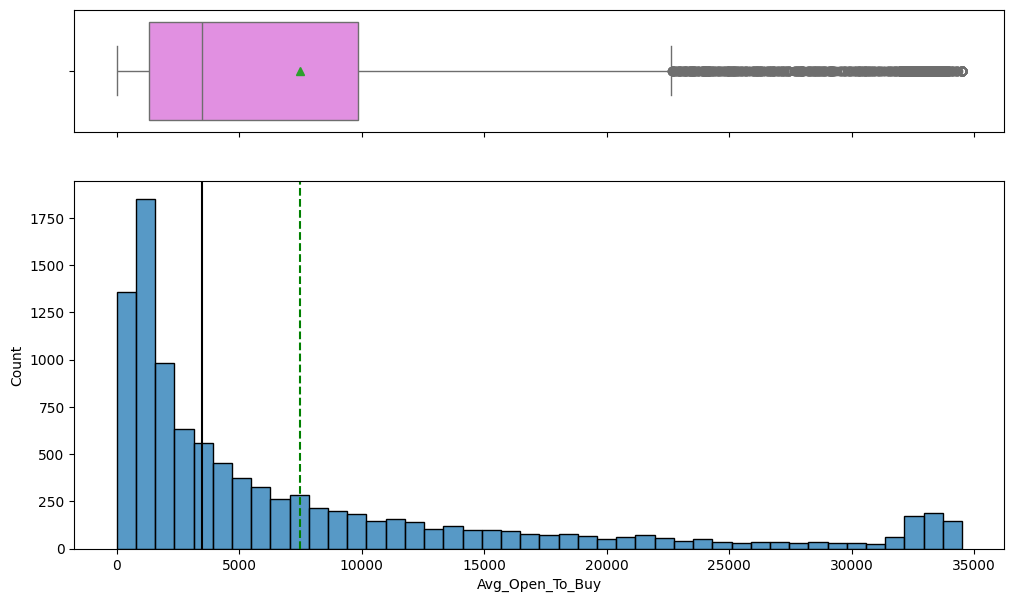

In [38]:
histogram_boxplot(data, "Avg_Open_To_Buy")

- The distribution of the Avg_Open_To_Buy column is right-skewed.
- This right-skewed distribution indicates that most customers have used a significant portion of their credit limit.
- Only a few customers (on the right tail) have a majority of their credit amount remaining.

### **Observations on Total_Trans_Ct**

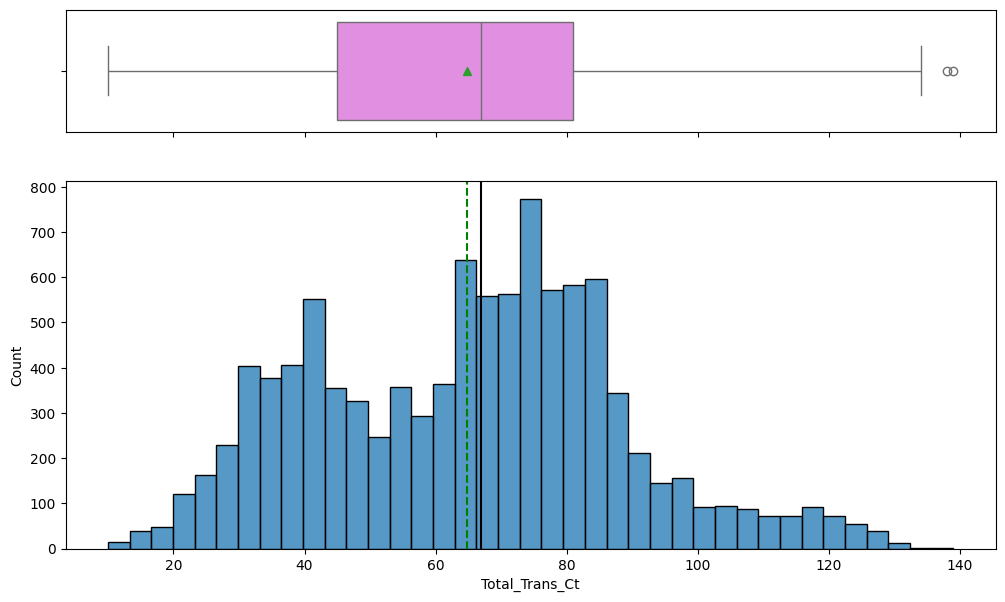

In [39]:
histogram_boxplot(data, "Total_Trans_Ct")

- The distribution of Total_Trans_Ct has two peaks at 40 and 80 transactions per year.
- This suggests that customers typically use their credit cards 3 to 6 times per month for transactions.

### **Observations on Total_Amt_Chng_Q4_Q1**

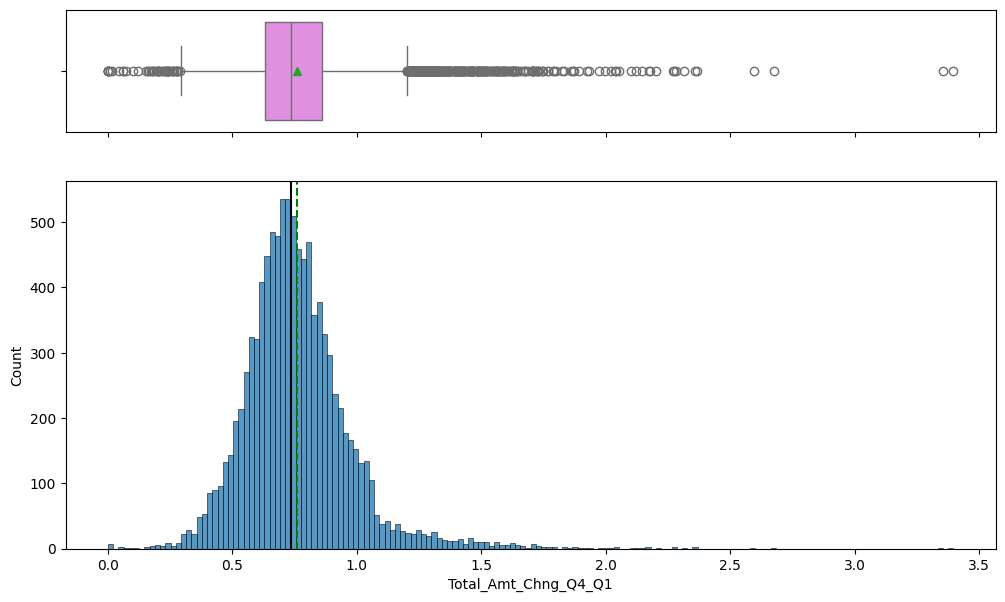

In [40]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

- The distribution of Total_Amt_Chng_Q4_Q1 appears to be normally distributed with a slight right skew.
- The boxplot reveals outliers on both sides of the whiskers.

### **Observations on Total_Trans_Amt**

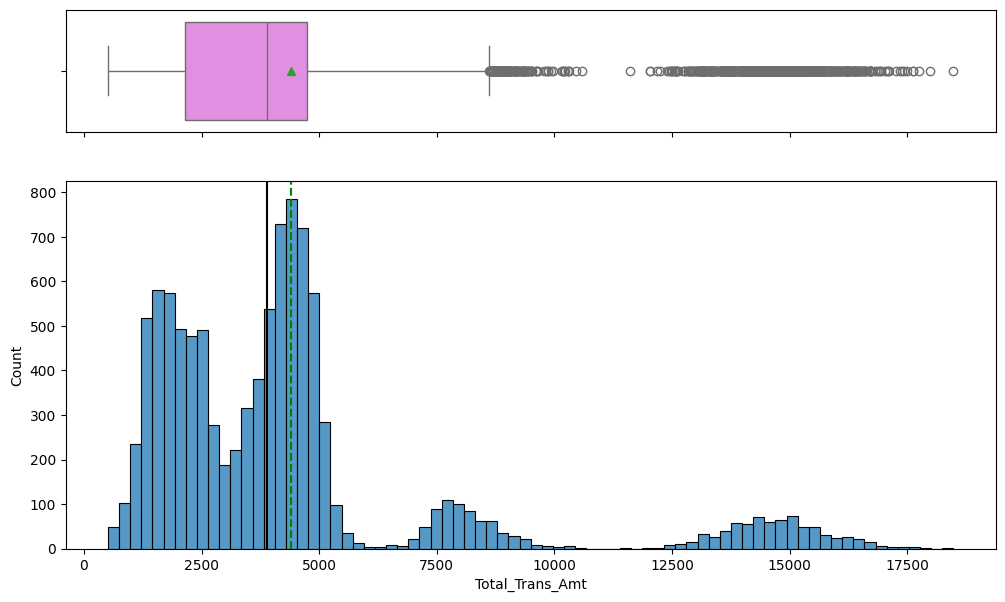

In [41]:
histogram_boxplot(data, "Total_Trans_Amt")

- The distribution of Total_Trans_Amt is right-skewed.
- There are two peaks in the data: one around 2,500 and another near the mean value of approximately 4,500.
- The boxplot shows outliers, with customers having total transaction amounts exceeding ~8,000 being considered outliers.
- It would be interesting to investigate whether customers spending less are churning or if those spending more are churning. If the latter is true, the bank could be losing valuable customers.

### **Observations on Total_Ct_Chng_Q4_Q1**

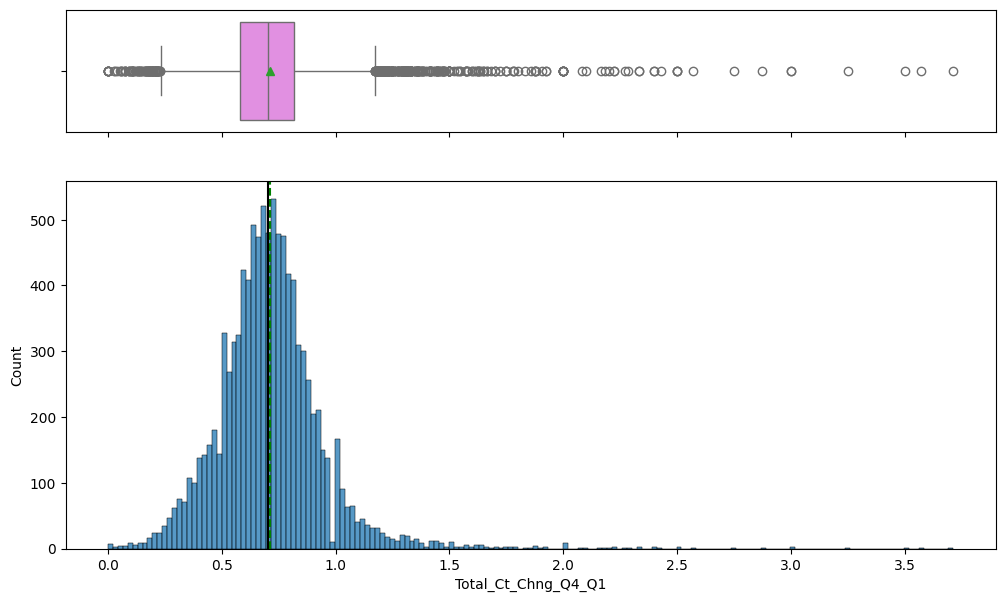

In [42]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

- The distribution of Total_Ct_Chng_Q4_Q1 appears to be normally distributed with a slight right skew.
- The boxplot indicates outliers on both sides of the whiskers.

`Avg_Utilization_Ratio`

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'New_Price'

`Dependent_count`

In [ ]:
labeled_barplot(data, "Dependent_count")

`Total_Relationship_Count`

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'Total_Relationship_Count'

`Months_Inactive_12_mon`

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'Months_Inactive_12_mon'

`Contacts_Count_12_mon`

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'Contacts_Count_12_mon'

`Gender`

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'Gender'

**Let's see the distribution of the level of education of customers**

`Education_Level`

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'Education_Level'

`Marital_Status`

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'Marital_Status'

**Let's see the distribution of the level of income of customers**

`Income_Category`

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'Income_Category'

`Card_Category`

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'Card_Category'

`Attrition_Flag`

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'Attrition_Flag'

In [ ]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

`Attrition_Flag vs Gender`

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

In [ ]:
stacked_barplot(data,"_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Marital_Status

`Attrition_Flag vs Education_Level`

In [ ]:
stacked_barplot(data,"_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Education_Level

`Attrition_Flag vs Income_Category`

In [ ]:
stacked_barplot(data,"_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

`Attrition_Flag vs Contacts_Count_12_mon`

In [ ]:
stacked_barplot(data,"_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

In [ ]:
stacked_barplot(data,"_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

`Attrition_Flag vs Total_Relationship_Count`

In [ ]:
stacked_barplot(data,"_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

`Attrition_Flag vs Dependent_count`

In [ ]:
stacked_barplot(data,"_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Dependent_count

`Total_Revolving_Bal` vs `Attrition_Flag`

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

In [ ]:
distribution_plot_wrt_target(data, "_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

`Attrition_Flag vs Customer_Age`

In [ ]:
distribution_plot_wrt_target(data, "_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

`Total_Trans_Ct` vs `Attrition_Flag`

In [ ]:
distribution_plot_wrt_target(data, "_____", "_____") ## Complete the code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

`Total_Trans_Amt` vs `Attrition_Flag`

In [ ]:
distribution_plot_wrt_target(data, "_____", "_____") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

In [ ]:
distribution_plot_wrt_target(data, "_____", "_____") ## Complete the code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

`Avg_Utilization_Ratio` vs `Attrition_Flag`

In [ ]:
distribution_plot_wrt_target(data, "_____", "_____") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag


`Attrition_Flag vs Months_on_book`

In [ ]:
distribution_plot_wrt_target(data, "_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

`Attrition_Flag vs Total_Revolving_Bal`

In [ ]:
distribution_plot_wrt_target(data, "_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

`Attrition_Flag vs Avg_Open_To_Buy`

In [ ]:
distribution_plot_wrt_target(data, "_____", "_____") ## Complete the code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

## Data Preprocessing

### Outlier Detection

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

### Train-Test Split

In [ ]:
# creating the copy of the dataframe
data1 = data.copy()

In [ ]:
data1["Income_Category"].replace("_____", np.nan, inplace=True) ### complete the code to replace the anomalous values with NaN

In [ ]:
data1.isna().sum()

In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split('_______') ## Complete the code to split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split('_______') ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

### Missing value imputation

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  '_______' ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[reqd_col_for_impute] = '_______' ## Complete the code to impute missing values in X_test

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

### Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = '_______'  ## Complete the code to impute missing values in X_val
X_test = '_______'  ## Complete the code to impute missing values in X_val
print(X_train.shape, X_val.shape, X_test.shape)

* After encoding there are 29 columns.

In [ ]:
# check the top 5 rows from the train dataset
X_train.head()

## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))

### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 3 models in the list models


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(_____, model.predict(_____))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
'_______' ## Complete the code to append remaining 3 models in the list models


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(____, model.predict(____))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

### Hyperparameter Tuning

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=___,
    n_estimators= _______, learning_rate= _______, base_estimator= DecisionTreeClassifier(max_depth=_______, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.'_______' ## Complete the code to fit the model on original data

In [ ]:
adb_train = model_performance_classification_sklearn(tuned_adb, ______, _____) ## Complete the code to check the performance on training set
adb_train

In [ ]:
# Checking model's performance on validation set
adb_val =  model_performance_classification_sklearn(tuned_adb, ______, _____) ## Complete the code to check the performance on validation set
adb_val

#### Tuning Ada Boost using undersampled data

In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state=___,
    n_estimators= _______, learning_rate= _______, base_estimator= DecisionTreeClassifier(max_depth=_______, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada2.'_______' ## Complete the code to fit the model on undersampled data

In [ ]:
adb2_train = '_______' ## Complete the code to check the performance on training set
adb2_train

In [ ]:
# Checking model's performance on validation set
adb2_val =  '_______' ## Complete the code to check the performance on validation set
adb2_val

#### Tuning Gradient Boosting using undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=_______,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=_______,
    n_estimators=_______,
    subsample=_______,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

In [ ]:
gbm1_train = '_______' ## Complete the code to check the performance on undersampled train set
gbm1_train

In [ ]:
gbm1_val = '_______' ## Complete the code to check the performance on validation set
gbm1_val

#### Tuning Gradient Boosting using original data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=_______,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=_______,
    n_estimators=_______,
    subsample=_______,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

#### Tuning Gradient Boosting using over sampled data

In [ ]:
gbm2_train = '_______' ## Complete the code to check the performance on oversampled train set
gbm2_train

In [ ]:
gbm2_val = '_______' ## Complete the code to check the performance on validation set
gbm2_val

#### Tuning XGBoost Model with Original data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=____,
    scale_pos_weight=____,
    n_estimators=____,
    learning_rate=______,
    gamma=1,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

In [ ]:
xgb_train = '_______' ## Complete the code to check the performance on original train set
xgb_train

In [ ]:
xgb_val = '_______' ## Complete the code to check the performance on validation set
xgb_val

## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# validation performance comparison

'_______' ## Write the code to compare the performance on validation set

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
'_______' ## Write the code to check the performance of best model on test data

### Feature Importances

In [ ]:
feature_names = X_train.columns
importances =  '_______' ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


-


***